In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import display, Math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from skimage import data,filters
import scipy.ndimage as ndimage
import numpy as np
from PIL import Image
from math import floor, ceil
import cv2
import os
import math
import random
import pandas as pd
image_dir = "../../CVassignment5_files"
p = 112
q = 92
rand_int = random.randint(0,40)

# Question 1
## 1a

In [2]:
training_path = f"{image_dir}/problem1_files/faces_training"
test_path = f"{image_dir}/problem1_files/faces_test"
training_images = [plt.imread(f"{training_path}/{x}") for x in os.listdir(training_path)]
test_images_1 = [plt.imread(f"{test_path}/test1/{x}") for x in os.listdir(f"{test_path}/test1/")]
test_images_2 = [plt.imread(f"{test_path}/test2/{x}") for x in os.listdir(f"{test_path}/test2/")]
test_images = test_images_1 + test_images_2

alpha = 38

def lower_rank_SVD(image, al):
    U, S, V = np.linalg.svd(image, full_matrices=False)
    S[al:] = 0
    S = np.diag(S)
    return U, S, V

def get_a(training_images):
    a_ = np.zeros(training_images[0].shape[0] * training_images[0].shape[1])
    for image in training_images:
        U, S, V = lower_rank_SVD(image, alpha)
        a_ = a_ + image.flatten()
    a_ = a_/len(training_images)
    return a_

def get_X(training_images, a_):
    X = np.array(np.zeros(len(a_)))
    X = np.transpose([X])
    for image in training_images:
        fi = image.flatten()
        x = fi - a_
        x = np.transpose([x])
        X = np.hstack((X, x))
    X = np.delete(X, 0, 1)
    return X/np.sqrt(len(training_images))

def get_SVD(X, alpha):
    U, S, V = np.linalg.svd(X)
    return U, S, V

def display_eigenfaces(U, alpha):
    for i in range(0, alpha):
        eig = np.transpose([U[:,i]])
        eig = eig - np.min(eig)
        eig = eig/np.max(eig)
        eig = (255*eig).astype(np.uint8)
        eig = eig.reshape(p, q)
        plt.imshow(eig, cmap='gray')
        plt.show()


In [3]:
a_ = get_a(training_images)
X = get_X(training_images, a_)
U, S, V = get_SVD(X, alpha)
U_alpha = U[:,:alpha]

Singular values:


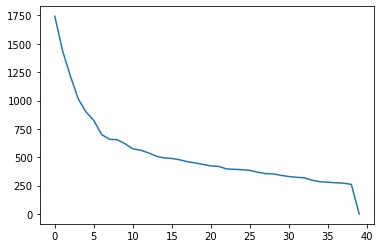

In [4]:
print("Singular values:")
plt.show()
plt.plot(S)

Average Vector:


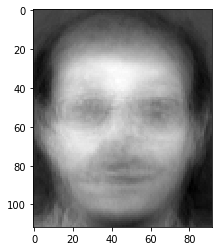

In [5]:
print("Average Vector:")
plt.imshow(a_.reshape(p, q).astype(np.uint8), cmap='gray')
plt.show()

Eigenfaces:


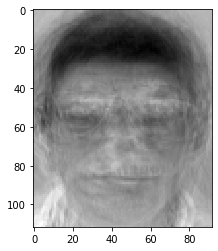

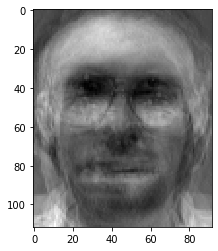

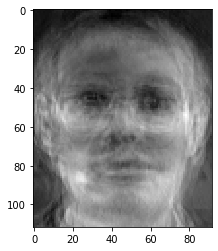

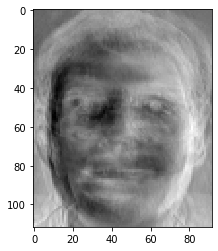

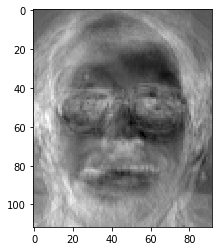

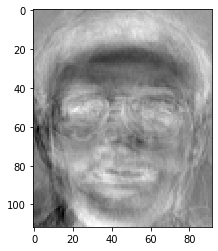

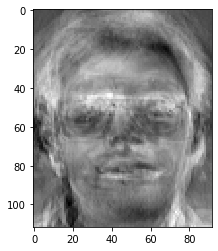

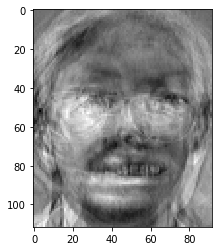

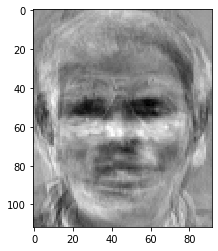

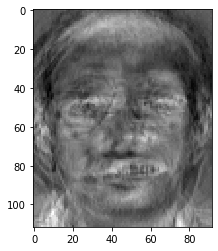

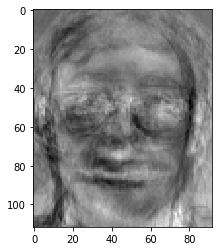

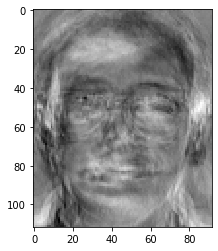

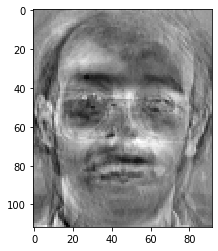

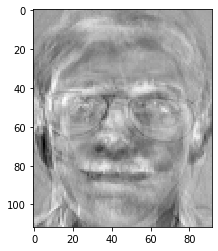

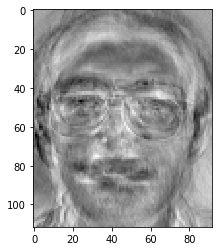

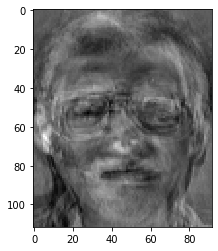

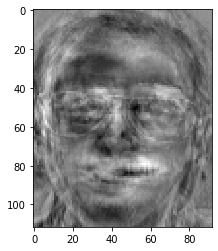

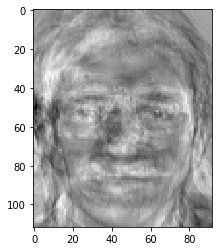

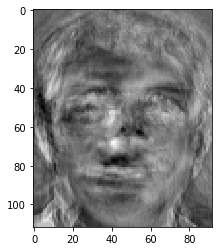

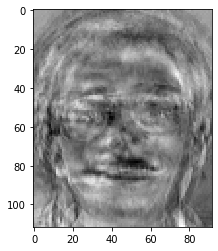

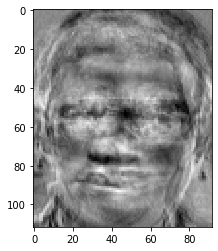

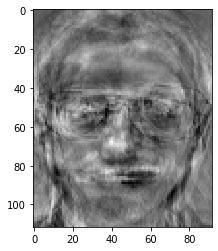

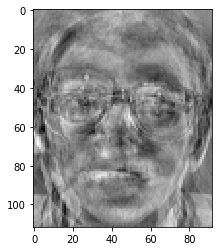

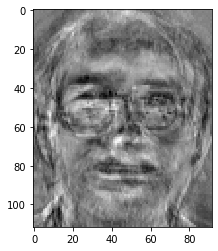

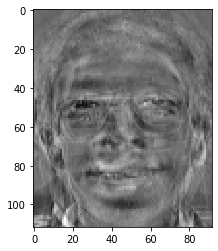

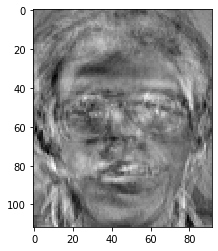

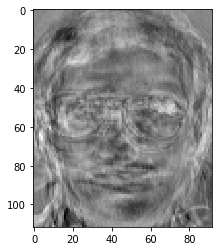

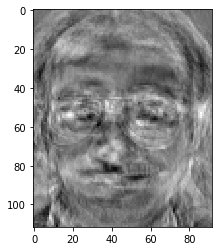

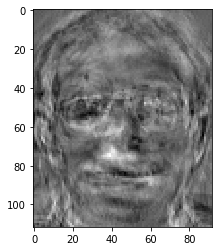

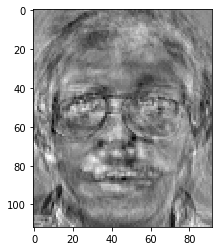

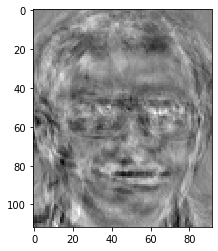

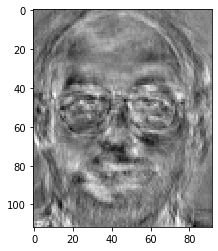

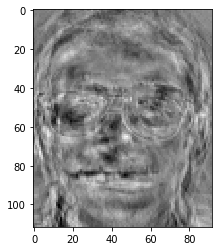

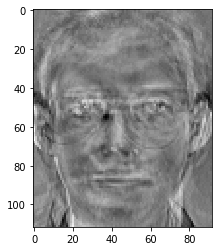

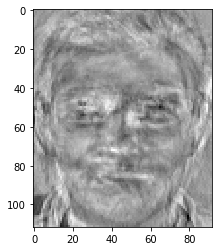

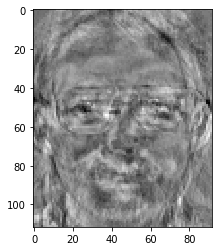

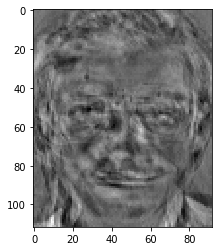

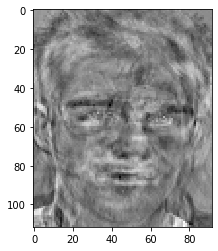

In [6]:
print("Eigenfaces:")
display_eigenfaces(U_alpha, alpha)

## 1b

In [7]:
def get_eigenfaces(image_set, U_alpha, a_):
    eigenfaces = []
    reconstructed = []
    for image in image_set:
        f = image.flatten()
        y = np.matmul(U_alpha.T, np.transpose([(f - a_)]))
        f_ = np.matmul(U_alpha, y) + np.transpose([a_])
        f_ = f_.reshape(p,q)
        f_ = f_.astype(np.uint8)
        eigenfaces.append(y)
        reconstructed.append(f_)
    return eigenfaces, reconstructed
test_eigenfaces, test_reconstructed = get_eigenfaces(test_images, U_alpha, a_)
training_eigenfaces, training_reconstructed = get_eigenfaces(training_images, U_alpha, a_)

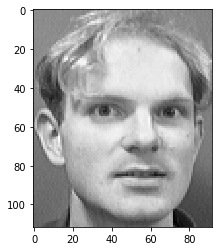

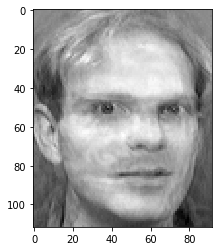

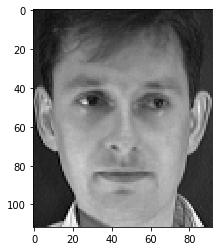

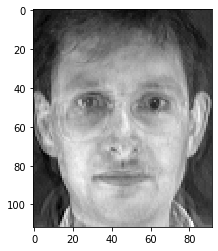

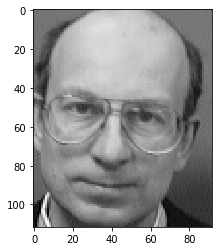

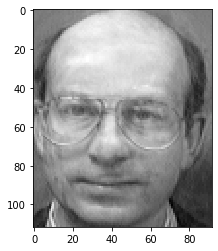

In [8]:
def display_reconstructed(test_images, test_reconstructed):
    for i in range(0, 3):
        plt.imshow(test_images[i], cmap='gray')
        plt.show()
        plt.imshow(test_reconstructed[i], cmap='gray')
        plt.show()
display_reconstructed(test_images, test_reconstructed)

## 1c

In [9]:
thresh= 2000
match_indices = []
for i in range(0, len(test_eigenfaces)):
    # Iterate through eigenfaces
    y1 = test_eigenfaces[i]
    best_dist = float("inf")
    best_match_index = -1
    for j in range(0, len(training_eigenfaces)):
        # Iterate through database of feature vectors
        y2 = training_eigenfaces[j]
        dist = np.linalg.norm(y1 - y2)
        if dist < best_dist:
            best_dist = dist
            best_match_index = j
    match_indices.append(best_match_index)

def get_accuracy(match_indices):
    right = 0
    wrong = 0
    for i in range(0,len(match_indices)):
        if match_indices[i] == i or match_indices[i] == i - 40:
            right += 1
        else:
            wrong += 1
    return 100*(right/len(match_indices))
print(alpha, get_accuracy(match_indices))

38 80.0


$\alpha$ = 5, Accuracy = 66.25% <br/>
$\alpha$ = 6, Accuracy = 70% <br/>
$\alpha$ = 7, Accuracy = 72.5% <br/>
$\alpha$ = 8, Accuracy = 76.25% <br/>
$\alpha$ = 9, Accuracy = 75% <br/>
$\alpha$ = 10, Accuracy = 76.25% <br/>
$\alpha$ = 11, Accuracy = 76.25% <br/>
$\alpha$ = 12, Accuracy = 78.75% <br/>
$\alpha$ = 13, Accuracy = 77.5% <br/>
$\alpha$ = 14, Accuracy = 76.25% <br/>
$\alpha$ = 15, Accuracy = 77.5% <br/>
$\alpha$ = 16, Accuracy = 80% <br/>
$\alpha$ = 17, Accuracy = 77.5% <br/>
$\alpha$ = 18, Accuracy = 78.75% <br/>
$\alpha$ = 19, Accuracy = 78.75% <br/>
$\alpha$ = 20, Accuracy = 78.75% <br/>
$\alpha$ = 21, Accuracy = 78.75% <br/>

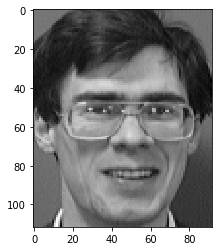

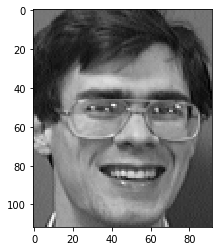

*****************************************


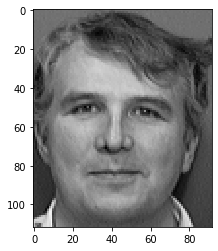

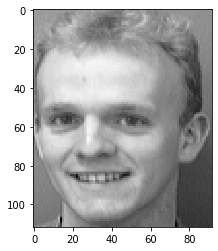

*****************************************


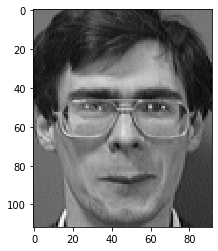

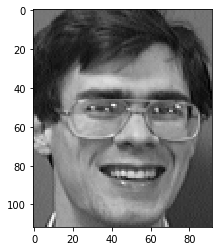

*****************************************


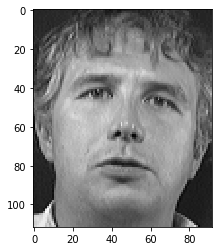

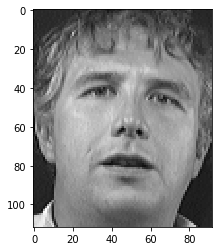

*****************************************


In [10]:
for i in range(3, len(match_indices), 20):
    plt.imshow(test_images[i], cmap='gray')
    plt.show()
    plt.imshow(training_images[match_indices[i]], cmap='gray')
    plt.show()
    print("*****************************************")

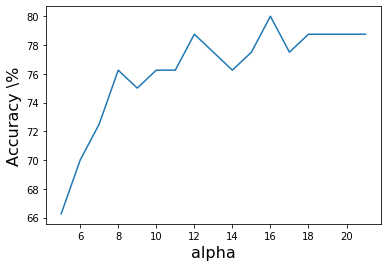

In [11]:
alphas = [x for x in range(5,22)]
accuracies = [66.25, 70, 72.5, 76.25,75,76.25,76.25, 78.75,77.5, 76.25,77.5,80, 77.5,78.75,78.75,78.75,78.75]
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel(r'alpha', fontsize=16)
ax.set_ylabel(r'Accuracy \%', fontsize=16)
plt.plot(alphas, accuracies)
plt.show()

# Question 2
## 2a

In [12]:
def get_images(category):
    data = {
        "train":[plt.imread(f"{image_dir}/problem2_files/images/{category}/train/{x}") for x in os.listdir(f"{image_dir}/problem2_files/images/{category}/train")],
        "test":[plt.imread(f"{image_dir}/problem2_files/images/{category}/test/{x}") for x in os.listdir(f"{image_dir}/problem2_files/images/{category}/test")],
    }
    return data

coast = get_images("Coast")
